In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'compiled data with CI.csv',
 'compiled Lplasmid pcr eff.ipynb',
 'compiled plasmid.ipynb',
 'compiledPlots for lin plasmid Standards for amps 1 to 10.png',
 'Lplasmid compiled stds.csv',
 'Lplasmid compiled stds.xlsx',
 'Untitled.ipynb']

In [4]:
df = pd.read_csv('Lplasmid compiled stds.csv')
df = df[df['Conc (fg/ul)'] != 0]
df = df[(df['CT']!='Undetermined') & (df['CT']!=0)]
df['CT'] = df['CT'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Run           514 non-null    int64  
 1   Amp           514 non-null    int64  
 2   Conc (fg/ul)  514 non-null    float64
 3   CT            514 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 20.1 KB


In [5]:
df = df[(df['CT']!='Undetermined') & (df['CT']!=0)]
df[(df['CT']=='Undetermined') | (df['CT']==0)]

,Run,Amp,Conc (fg/ul),CT


In [6]:
#df['Conc (pg/ul)'] = df['Conc (fg/ul)']/1000
#df['Quantity'] = np.log10(df['Conc (pg/ul)'])
#df.head(10)

# Quantity as log 10 pg/ul

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
0,1,2,1000000.0,8.770,1000.0,3.0
1,1,2,1000000.0,8.830,1000.0,3.0
2,1,2,100000.0,12.457,100.0,2.0
3,1,2,100000.0,12.572,100.0,2.0
4,1,2,10000.0,15.717,10.0,1.0
5,1,2,10000.0,15.664,10.0,1.0
6,1,2,1000.0,18.950,1.0,0.0
7,1,2,1000.0,18.975,1.0,0.0
8,1,2,100.0,22.889,0.1,-1.0
9,1,2,100.0,22.831,0.1,-1.0


In [367]:
df['Quantity'] = np.log10(df['Conc (fg/ul)'])
df.head(10)

# Quantity as log 10 fg/ul

,Run,Amp,Conc (fg/ul),CT,Conc (pg/ul),Quantity
270,4,1,0.1,38.431,0.0001,-1.0
271,4,1,0.1,38.414,0.0001,-1.0
266,4,1,1.0,36.570,0.0010,0.0
268,5,1,1.0,38.394,0.0010,0.0
259,5,1,10.0,35.767,0.0100,1.0
260,6,1,10.0,36.963,0.0100,1.0
261,6,1,10.0,36.993,0.0100,1.0
262,6,1,10.0,36.507,0.0100,1.0
263,8,1,10.0,34.475,0.0100,1.0
264,8,1,10.0,35.303,0.0100,1.0


In [368]:
df = df.sort_values(by=['Amp','Quantity'],ascending=True)
df_grp = df.groupby(by=['Run','Amp','Quantity',]).agg({'CT':['mean','std','count']},)
df_grp.round(decimals=3)

CT             
                    mean    std count
Run Amp Quantity                     
1   2   2.0       22.860  0.041     2
        3.0       18.962  0.018     2
        4.0       15.690  0.037     2
        5.0       12.514  0.081     2
        6.0        8.800  0.042     2
...                  ...    ...   ...
11  10  0.0       28.908  0.219     2
        1.0       26.423  0.082     2
        2.0       23.353  0.034     2
        4.0       18.215  0.054     2
        5.0       12.252  0.058     2

[256 rows x 3 columns]

# 601 mRNA 1apr std curves

In [72]:
df_grp.loc[9,2].index

Float64Index([-2.0, -1.0, 0.0, 1.0, 2.0], dtype='float64', name='Quantity')

<AxesSubplot:title={'center':'Standard Curve for Amp2'}, xlabel='Quantity', ylabel='MeanCT'>

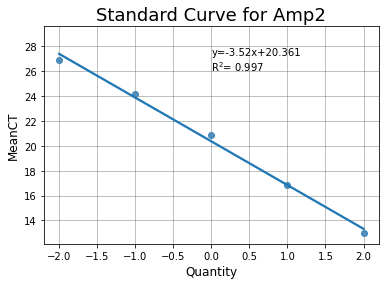

In [103]:
qty = df_grp.loc[9,2].index
meanCT = df_grp.loc[9,2]['CT']['mean']

result = stats.linregress(x=qty,
                         y=meanCT)

result = np.round(result,
                  decimals=3)

slope = result[0]
yintercept = result[1]
corrcoef = result[2]

ax = sns.regplot(x=qty,
           y=meanCT,  
           )
plt.setp(ax.collections[1],alpha=0)
plt.title('Standard Curve for Amp2',
         fontsize=18
         )
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('MeanCT', fontsize = 12)

# showing the regresion statistics
ax.annotate("y={}x+{}\nR$^2$= {}".format(slope,
                                    yintercept,
                                     -1 * corrcoef
                                    ),
            xy=(0,26)
           )





# showing the grid line
ax.grid(which='major',
     axis='both',
    color='grey',
     linestyle='-',
     linewidth=0.5)


ax

In [111]:
df_grp.loc[9]

CT                
                 mean       std count
Amp Quantity                         
2   -2.0      26.8935  0.225567     2
    -1.0      24.2030  0.132936     2
     0.0      20.9055  0.111016     2
     1.0      16.8090  0.189505     2
     2.0      12.9920  0.261630     2
4   -2.0      26.6125  0.019092     2
    -1.0      23.9485  0.031820     2
     0.0      20.6405  0.038891     2
     1.0      16.5040  0.024042     2
     2.0      12.7055  0.068589     2
5   -2.0      26.8665  0.098288     2
    -1.0      24.1555  0.127986     2
     0.0      20.8385  0.228395     2
     1.0      16.7430  0.209304     2
     2.0      12.7760  0.066468     2
7   -2.0      25.7940  0.210718     2
    -1.0      22.3655  0.211425     2
     0.0      19.4540  0.132936     2
     1.0      15.6400  0.159806     2
     2.0      11.9010  0.220617     2
10  -2.0      26.2700  0.229103     2
    -1.0      22.7985  0.154856     2
     0.0      19.9665  0.183141     2
     1.0      16.2295  0.142128     2
     2.0      12.4990  0.181019     2

In [446]:
statsummdata = []
index_names = []
#Amp = 4
def statsumm(RunNum=9,Amp=2):
    # creating the variables for the quantity and mean ct values
    qty = df_grp.loc[RunNum,Amp].index
    meanCT = df_grp.loc[RunNum,Amp]['CT']['mean']
    
    # calculating the linear regression statistics
    result = stats.linregress(x=qty,
                             y=meanCT)
    
    # rounding the statistics to 3 decimal places
    result = np.round(result,
                      decimals=3)
    
    # passing the statistics of interest to variables
    slope = result[0]
    yintercept = result[1]
    corrcoef = result[2]
    
    statsummdata.append([('Amp'+str(amp)),slope,yintercept,corrcoef])
    #index_names.append()
    return Amp,slope,yintercept,corrcoef,qty,meanCT

In [447]:
#ax=0
def plotter(Amp,slope,yintercept,corrcoef,qty,meanCT):    
    # plotting the graph
    gplot = sns.regplot(x=qty,
                        y=meanCT,
                        ax=ax
               )
    plt.setp(gplot.collections[1],alpha=0)
    
    ax.set_title('Standard Curve for Amp'+str(Amp),
             fontsize=18
             )
    print(Amp)
    
    ax.set_xlabel('Quantity', fontsize = 12)
    ax.set_ylabel('MeanCT', fontsize = 12)
    
    # showing the regresion statistics
    ax.annotate("y={}x+{}\nR$^2$= {}".format(slope,
                                        yintercept,
                                         -1 * corrcoef
                                        ),
                xy=(0.5,0.85),
                xycoords='axes fraction'
               )
    




    # showing the grid line
    gplot.grid(which='major',
         axis='both',
        color='grey',
         linestyle='-',
         linewidth=0.5)

2
4
5
7
10


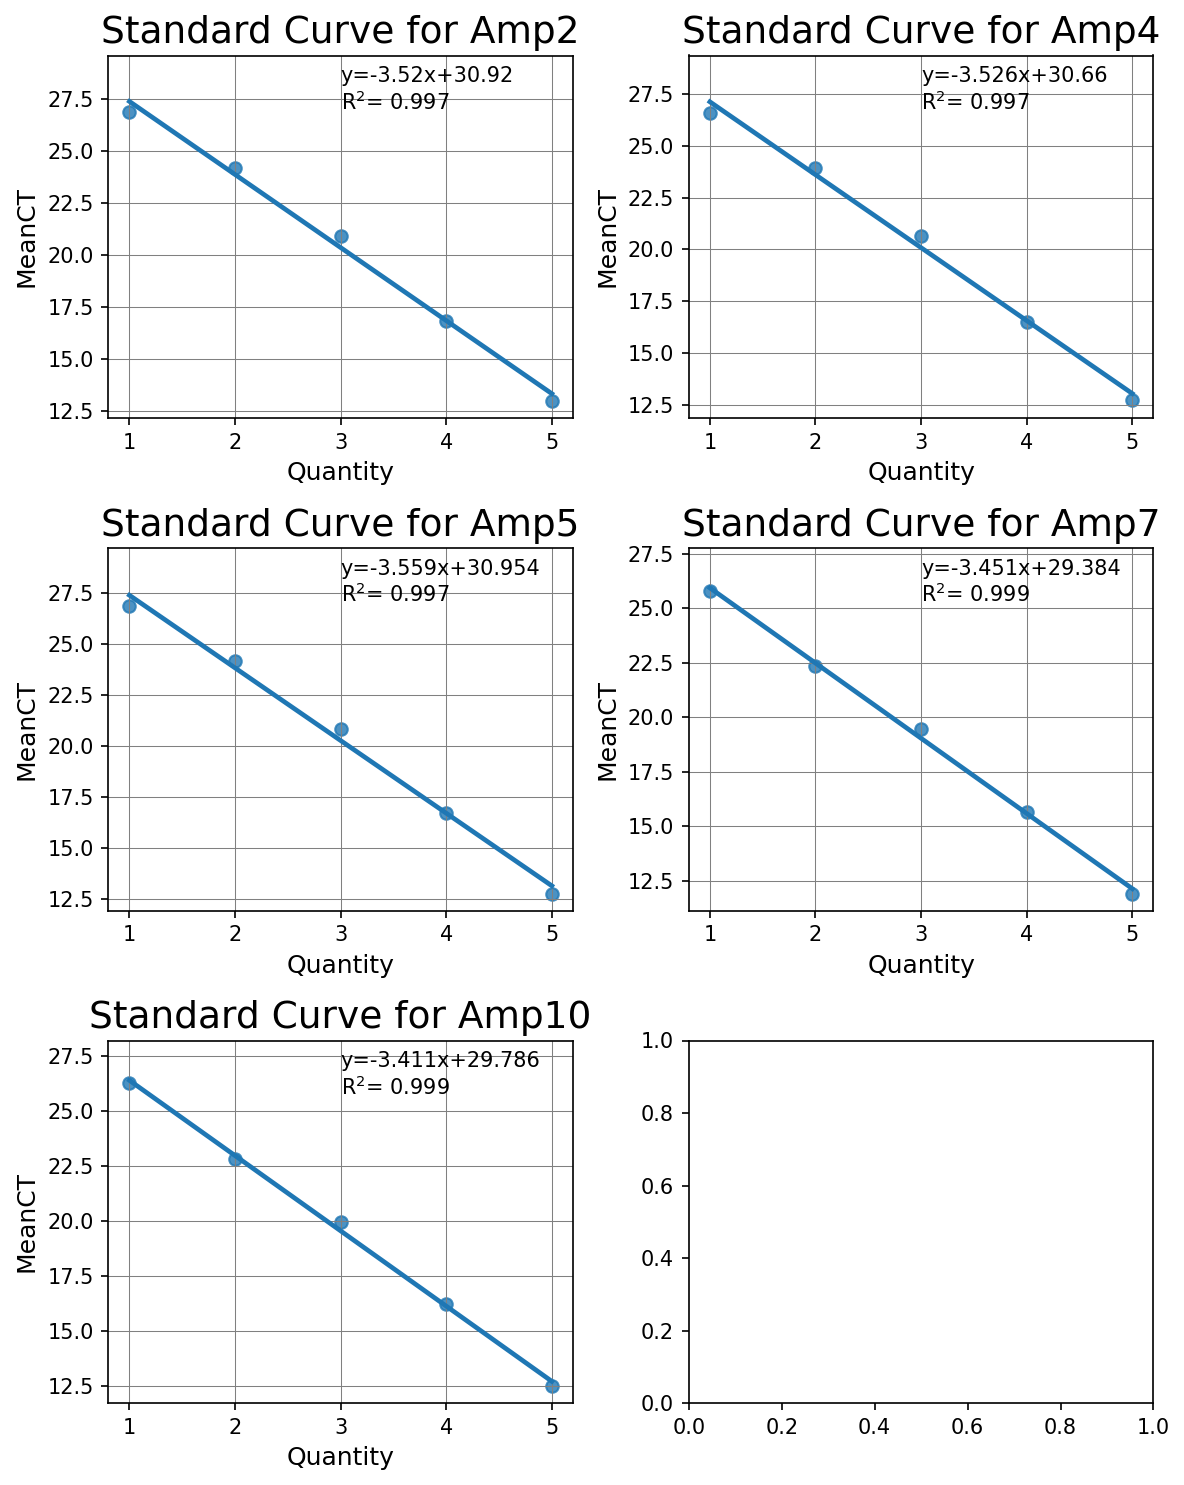

In [448]:
fig, axs = plt.subplots(nrows=3,ncols=2,
                        figsize=(8,10),
                        sharex=False,
                        tight_layout=True,
                        dpi=150)

for ax,amp in zip(axs.ravel(),(2,4,5,7,10)):
    plotter(*statsumm(9,amp))

In [449]:
statsummdata

[['Amp2', -3.52, 30.92, -0.997],
 ['Amp4', -3.526, 30.66, -0.997],
 ['Amp5', -3.559, 30.954, -0.997],
 ['Amp7', -3.451, 29.384, -0.999],
 ['Amp10', -3.411, 29.786, -0.999]]

In [444]:
index_names

['Amp2', 'Amp4', 'Amp5', 'Amp7', 'Amp10']

In [454]:
pd.DataFrame(statsummdata,
             columns = ['Amp','Slope','Intercept','R_value'])

,Amp,Slope,Intercept,R_value
0,Amp2,-3.520,30.920,-0.997
1,Amp4,-3.526,30.660,-0.997
2,Amp5,-3.559,30.954,-0.997
3,Amp7,-3.451,29.384,-0.999
4,Amp10,-3.411,29.786,-0.999


In [369]:
def graphplotter(RunNum=9,Amp=2):
    
    # creating the variables for the quantity and mean ct values
    qty = df_grp.loc[RunNum,Amp].index
    meanCT = df_grp.loc[RunNum,Amp]['CT']['mean']
    
    # calculating the linear regression statistics
    result = stats.linregress(x=qty,
                             y=meanCT)
    
    # rounding the statistics to 3 decimal places
    result = np.round(result,
                      decimals=3)
    
    # passing the statistics of interest to variables
    slope = result[0]
    yintercept = result[1]
    corrcoef = result[2]
    
    
    # plotting the graph
    gplot = sns.regplot(x=qty,
                        y=meanCT,
                        ax=ax
               )
    plt.setp(gplot.collections[1],alpha=0)
    ax.set_title('Standard Curve for Amp'+str(Amp),
             fontsize=18
             )
    ax.set_xlabel('Quantity', fontsize = 12)
    ax.set_ylabel('MeanCT', fontsize = 12)

    # showing the regresion statistics
    ax.annotate("y={}x+{}\nR$^2$= {}".format(slope,
                                        yintercept,
                                         -1 * corrcoef
                                        ),
                xy=(0.5,0.85),
                xycoords='axes fraction'
               )





    # showing the grid line
    gplot.grid(which='major',
         axis='both',
        color='grey',
         linestyle='-',
         linewidth=0.5)


    #return gplot

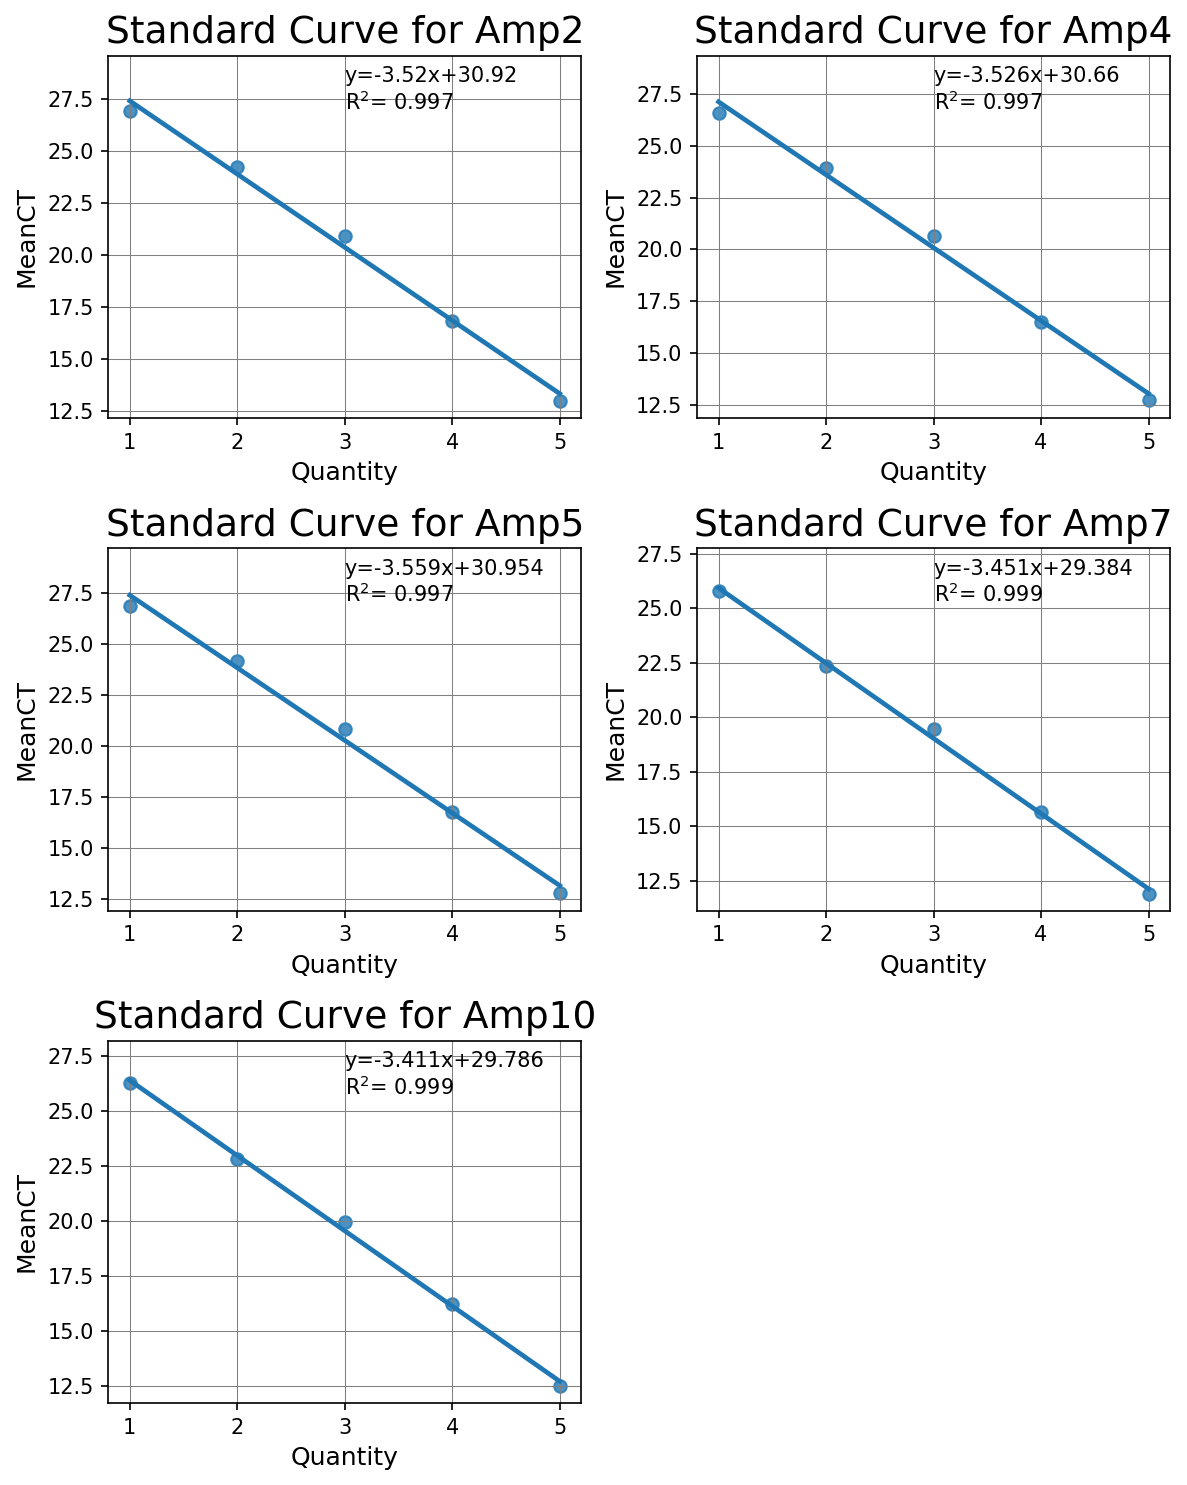

In [370]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(8,10),sharex=False,tight_layout=True,dpi=150)
for ax,amp in zip(axs.ravel(),(2,4,5,7,10)):
    graphplotter(RunNum=9,Amp=amp)

fig.delaxes(axs[2, 1])
#plt.savefig('compiled std curve for Run9 601 mRNA on 1apr.png')



# note that the quantity is log10 pg/ul

In [214]:
slope

-3.52

# 601 mRNA 1 apr mRNA samples

In [464]:
xval = [(277.697394,256.0262601,544.8296705,563.3317447,2495.835134,2102.743986),
(375.1926791,306.1841804,612.1611813,644.7034095,3077.694524,2638.26058),
('NaN','NaN','NaN','NaN',3420.368923,2854.168687),
(22.70790366,18.91369619,'NaN','NaN','NaN','NaN'),
('NaN','NaN',1071.190176,1034.069084,1984.343472,1664.710432)]
log10confgul = ['9_1','9_2','8_1','8_2','7_1','7_2']       
yval = [2,4,5,7,10]

In [465]:
pd.DataFrame(np.array(xval),
                   columns=log10confgul)

,9_1,9_2,8_1,8_2,7_1,7_2
0,277.697394,256.0262601,544.8296705,563.3317447,2495.835134,2102.743986
1,375.1926791,306.1841804,612.1611813,644.7034095,3077.694524,2638.26058
2,NaN,NaN,NaN,NaN,3420.368923,2854.168687
3,22.70790366,18.91369619,NaN,NaN,NaN,NaN
4,NaN,NaN,1071.190176,1034.069084,1984.343472,1664.710432
